In [1]:
import pandas as pd

In [36]:
df=pd.read_csv(r"C:\Users\mutte\OneDrive\Desktop\cricket dataset\Batting\test.csv")
df2=pd.read_csv(r"C:\Users\mutte\OneDrive\Desktop\cricket dataset\Bowling\Bowling_test.csv")

In [3]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Unnamed: 11
0,0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,NaN
1,1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,NaN
2,2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,NaN
3,3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,NaN
4,4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,NaN


In [9]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce').fillna(0)

<Axes: ylabel='Runs'>

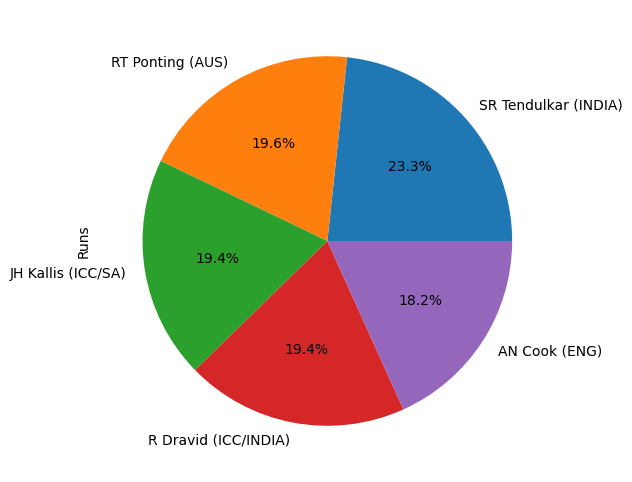

In [12]:
df['Runs'].head().plot(kind='pie', labels=df['Player'].head().tolist(), autopct='%1.1f%%', figsize=(6, 6))


In [15]:
df2.head()

,Unnamed: 0,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10,Unnamed: 14
0,0,M Muralitharan (ICC/SL),1992-2010,133,230,44039,18180,800,9/51,16/220,22.72,2.47,55.0,67,22,NaN
1,1,SK Warne (AUS),1992-2007,145,273,40705,17995,708,8/71,12/128,25.41,2.65,57.4,37,10,NaN
2,2,A Kumble (INDIA),1990-2008,132,236,40850,18355,619,10/74,14/149,29.65,2.69,65.9,35,8,NaN
3,3,JM Anderson (ENG),2003-2019,150,280,32557,15607,577,7/42,11/71,27.04,2.87,56.4,27,3,NaN
4,4,GD McGrath (AUS),1993-2007,124,243,29248,12186,563,8/24,10/27,21.64,2.49,51.9,29,3,NaN


In [25]:
df2['Wkts']=pd.to_numeric(df2['Wkts'],errors='coerce').fillna(0)

<Axes: ylabel='Wkts'>

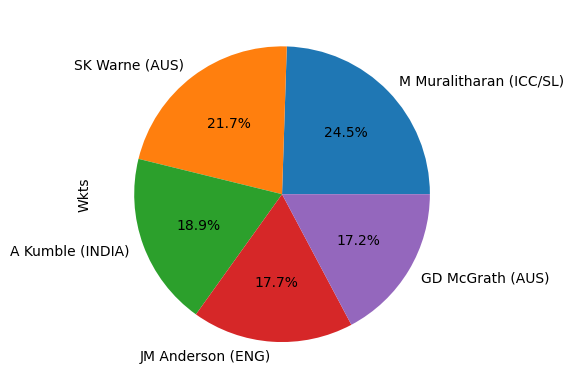

In [32]:
df2['Wkts'].head().plot(kind='pie',labels=df2['Player'].head(),autopct='%1.1f%%')

In [34]:
from sklearn import linear_model
import numpy as np
lr=linear_model.LinearRegression()

In [50]:
k=np.random.rand(len(df2)) < 0.75
train=df2[k]
test=df2[~k]

In [59]:
x_train=np.asanyarray(train[['Mat']])
y_train=np.asanyarray(train[['Inns']])
x_test=np.asanyarray(test[['Mat']])
y_test=np.asanyarray(test[['Inns']])

In [52]:
model=lr.fit(x_train,y_train)

In [53]:
model

LinearRegression()

In [54]:
model.intercept_

array([7.62250883])

Text(0, 0.5, 'Inns')

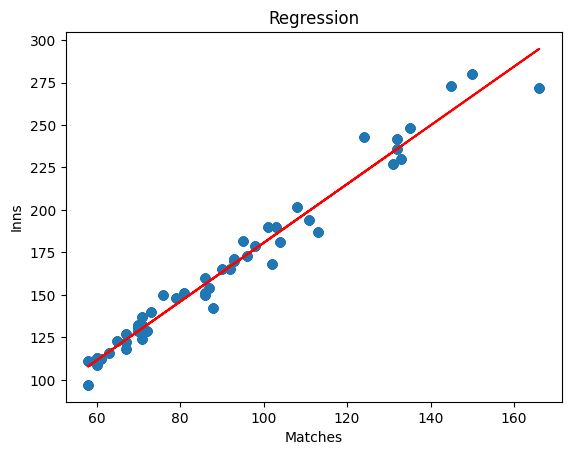

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_train,model.intercept_ + model.coef_ * x_train,color='r')
plt.title('Regression')
plt.xlabel('Matches')
plt.ylabel('Inns')

In [60]:
y_pred=model.predict(x_test)

In [61]:
from sklearn import metrics

In [67]:
ts_mse=metrics.mean_squared_error(y_test,y_pred)
tr_mse=metrics.mean_squared_error(y_train,model.intercept_ + model.coef_*x_train)
print('training mse : ',tr_mse,'  testing mse : ',ts_mse)

training mse :  63.976536761375755   testing mse :  70.42977079645446


In [63]:
print()

63.976536761375755
